In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def Mac_Cormack(c,gamma,U,F,dx,dt, t_ini,t_fin):
    U_temp=U.copy()
    F_temp=F.copy()
    
    U_new=U.copy()
    F_new=F.copy()
    
    t=t_ini
    
    while t<t_fin:
        #print str(t)+':\n'
        U_temp[:,1:-1]=U[:,1:-1]-dt*(F[:,2:]-F[:,1:-1])/dx
        F_temp=get_F(U_temp,gamma)
        
        U_new[:,1:-1]=(U[:,1:-1]+U_temp[:,1:-1]-dt*(F_temp[:,1:-1]-F_temp[:,0:-2])/dx)/2.0
        F_new= get_F(U_new,gamma)
        
        F=F_new.copy()
        U=U_new.copy()
        
        umax=max(np.abs(safe_div(U[1,:],U[0,:])))
        if umax!=0.0:
            dt=max(1e-3,dx/(c*umax))
        dt=min(dt,dx)

        t+=dt
        #print str(t)+': '+str(dt) +'\t '+str(umax)
    return U 

In [7]:
def get_F(U,gamma):
    rho=U[0,:]
    #u=U[1,:]/rho
    u=safe_div(U[1,:],rho)
    e=U[2,:]
    p=(gamma-1)*(e-rho*(u**2)/2.0)
    F=np.zeros(np.shape(U))
    F[0,:]=U[1,:]
    F[1,:]=rho*(u**2)+p
    F[2,:]=u*(e+p)
    #print 'u:\n'+str(u)
    #print 'rho:\n'+str(rho)
    #print 'p:\n'+str(p)
    #raw_input()
    return F

In [4]:
def get_e(gamma, rho,u,p):
    u2=u**2
    e=p/(gamma-1)+rho*u2/(2.0)
    return e

def safe_div(num,denom):
    ans=num.copy()
    for i in range(len(num)):
        if denom[i]!=0.0:
            ans[i]=num[i]/denom[i]
    return ans

/home/canrilo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in multiply
/home/canrilo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in subtract
/home/canrilo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in multiply
/home/canrilo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in subtract
/home/canrilo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in multiply
/home/canrilo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in add
/home/canrilo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in subtract


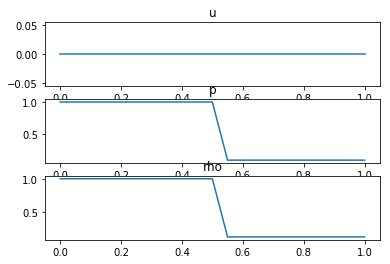

In [8]:
dx=0.05
dt=0.00001
tmax=1.0
c=2.0
xsteps=int(1/dx)+1
gamma=1.4
x=np.linspace(0,1,xsteps)
u=np.zeros(np.shape(x))

rho=u.copy()
rho[x<=0.5]=1.0
rho[x>0.5]=0.125

p=u.copy()
p[x<=0.5]=1.0
p[x>0.5]=0.1

e=get_e(gamma,rho,u,p)

U_ini=np.zeros([3,np.shape(x)[0]])
U_ini[0,:]=rho.copy()
U_ini[1,:]=rho*u
U_ini[2,:]=e.copy()

F_ini=np.zeros([3,np.shape(x)[0]])
F_ini[0,:]=u*rho
F_ini[1,:]=rho*(u**2)+p
F_ini[2,:]=u*(e+p)

U_final=Mac_Cormack(c,gamma,U_ini,F_ini,dx,dt,0.0,tmax)

rho_final =U_final[0,:]
u_final = safe_div(U_final[1,:],rho_final)#U_final[1,:]/rho_final
e_final = U_final[2,:]
p_final=(gamma-1)*(e_final-rho_final*(u_final**2)/2.0)

fig = plt.figure()

axu = fig.add_subplot(311)
axu.plot(x,u)
axu.plot(x,u_final)
axu.set_title('u')

axp = fig.add_subplot(312)
axp.plot(x,p)
axp.plot(x,p_final)
axp.set_title('p')

axr = fig.add_subplot(313)
axr.plot(x,rho)
axr.plot(x,rho_final)
axr.set_title('rho')

plt.show()